In [1]:
import pandas as pd
from glob import glob

# Function for parsing the right columns:
(*Yeah, so, the geniuses at census.gov thought it would be nice to let the column identifiers change for every year for the effing metric*)

In [2]:
def get_race_col(df_year):
    lst=list(df_year.iloc[0,:].values)
    column_search=[[x for x in lst if 'Total population' in x][0],
    [x for x in lst if 'One race - White' in x][0],
    [x for x in lst if 'One race - Black' in x][0],
    [x for x in lst if 'One race - Asian' in x][0],
    [x for x in lst if 'Mexican' in x][0],
    [x for x in lst if 'Chinese' in x][0]]
    return column_search

# Parsing the data and generating the required csv file for visualizing using storyline.js

In [3]:
csv_files=glob('*_ann.csv')
df_combined=pd.DataFrame(columns=['year','Overall','White','Black','Asian','Mexican','Chinese'])

for i,file_id in enumerate(csv_files):
    print(file_id)
    year=file_id[4:6]
    print(year)
    df_combined.loc[i,'year']=int('20'+year)
    df_year=pd.read_csv(file_id,skiprows=0)
    column_search_year=get_race_col(df_year)
    df_year_2=pd.read_csv(file_id,skiprows=1)
    pop_vec=df_year_2.loc[0,column_search_year].values
    df_combined.loc[i,1:]=pop_vec
    print(pop_vec)

ACS_10_5YR_DP05_with_ann.csv
10
[789172 406874 49071 264709 61741 166683]
ACS_11_5YR_DP05_with_ann.csv
11
[797983 408857 49260 267289 62939 170616]
ACS_12_5YR_DP05_with_ann.csv
12
[807755 409445 48419 270503 62736 170897]
ACS_13_5YR_DP05_with_ann.csv
13
[817501 411561 47992 272599 62702 171564]
ACS_14_5YR_DP05_with_ann.csv
14
[829072 410245 47611 278274 64177 175091]
ACS_15_5YR_DP05_with_ann.csv
15
[840763 409681 46825 284426 65649 179644]


In [4]:
df_combined

,year,Overall,White,Black,Asian,Mexican,Chinese
0,2010,789172,406874,49071,264709,61741,166683
1,2011,797983,408857,49260,267289,62939,170616
2,2012,807755,409445,48419,270503,62736,170897
3,2013,817501,411561,47992,272599,62702,171564
4,2014,829072,410245,47611,278274,64177,175091
5,2015,840763,409681,46825,284426,65649,179644


In [5]:
df_combined.to_csv('population_SF_race.csv',index=False)

# Now, edit the title and text columns on google sheets. 
For example:
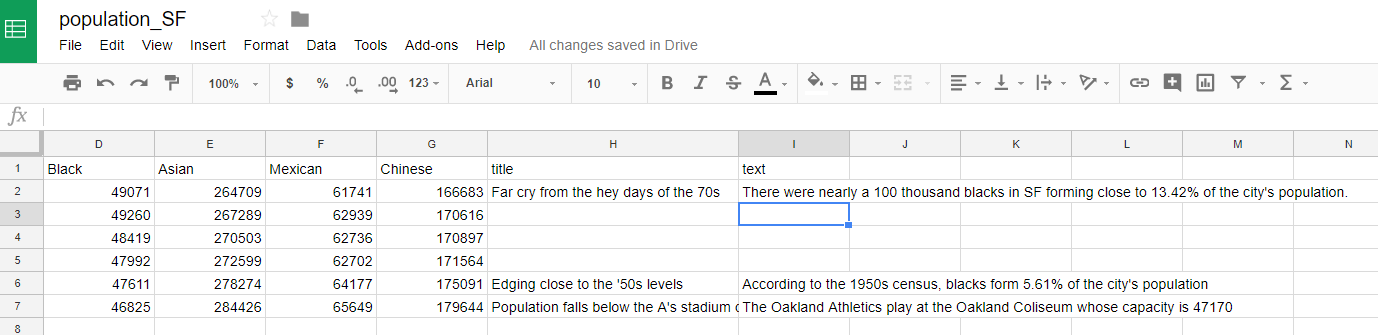

# Last steps:
- go to https://storyline.knightlab.com/ and generate the iframe. 
- install ihtml from here: https://github.com/thedataincubator/ihtml
-  Embed and visualize!

In [6]:
import ihtml
import warnings
warnings.filterwarnings('ignore')

In [7]:
%%ihtml 550
<iframe src="https://cdn.knightlab.com/libs/storyline/latest/embed/index.html?dataURL=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2F1tVGDusNhpF6dmqufbYhLqApcA7Fl_oMmiw19NtyZmY8%2Fedit%23gid%3D1112356917&amp;dataYCol=black&amp;dataXCol=year&amp;dataDateFormat=%25Y&amp;chartDateFormat=%25Y&amp;chartYLabel=Black%20population&amp;sliderCardTitleCol=title&amp;sliderCardTextCol=text" style="width:90%;height:750px;" frameborder="100" marginwidth="100" marginheight="100" vspace="100" hspace="0"></iframe>

<iframe
 width="100%"
 height="550"
 src="data:text/html;base64,PGlmcmFtZSBzcmM9Imh0dHBzOi8vY2RuLmtuaWdodGxhYi5jb20vbGlicy9zdG9yeWxpbmUvbGF0ZXN0L2VtYmVkL2luZGV4Lmh0bWw/ZGF0YVVSTD1odHRwcyUzQSUyRiUyRmRvY3MuZ29vZ2xlLmNvbSUyRnNwcmVhZHNoZWV0cyUyRmQlMkYxdFZHRHVzTmhwRjZkbXF1ZmJZaExxQXBjQTdGbF9vTW1pdzE5TnR5Wm1ZOCUyRmVkaXQlMjNnaWQlM0QxMTEyMzU2OTE3JmFtcDtkYXRhWUNvbD1ibGFjayZhbXA7ZGF0YVhDb2w9eWVhciZhbXA7ZGF0YURhdGVGb3JtYXQ9JTI1WSZhbXA7Y2hhcnREYXRlRm9ybWF0PSUyNVkmYW1wO2NoYXJ0WUxhYmVsPUJsYWNrJTIwcG9wdWxhdGlvbiZhbXA7c2xpZGVyQ2FyZFRpdGxlQ29sPXRpdGxlJmFtcDtzbGlkZXJDYXJkVGV4dENvbD10ZXh0IiBzdHlsZT0id2lkdGg6OTAlO2hlaWdodDo3NTBweDsiIGZyYW1lYm9yZGVyPSIxMDAiIG1hcmdpbndpZHRoPSIxMDAiIG1hcmdpbmhlaWdodD0iMTAwIiB2c3BhY2U9IjEwMCIgaHNwYWNlPSIwIj48L2lmcmFtZT4="
 frameborder="0"
 allowfullscreen
 >